In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_DA_GER = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'Germany')].copy()

In [3]:
df_DA_GER['job_posted_month_no'] = df_DA_GER['job_posted_date'].dt.month

In [4]:
df_DA_GER_explode = df_DA_GER.explode('job_skills')

In [5]:
df_DA_GER_pivot = df_DA_GER_explode.pivot_table(index = 'job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_GER_pivot.loc['Total'] = df_DA_GER_pivot.sum()

df_DA_GER_pivot = df_DA_GER_pivot[df_DA_GER_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_GER_pivot = df_DA_GER_pivot.drop('Total')

In [6]:
DA_totals = df_DA_GER.groupby('job_posted_month_no').size()

In [7]:
df_DA_GER_percent = df_DA_GER_pivot.div(DA_totals/100, axis=0)

In [8]:
#changing month number to a month name
df_DA_GER_percent = df_DA_GER_percent.reset_index()
df_DA_GER_percent['job_posted_month'] = df_DA_GER_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m'). strftime('%b'))
df_DA_GER_percent = df_DA_GER_percent.set_index('job_posted_month')
df_DA_GER_percent = df_DA_GER_percent.drop(columns='job_posted_month_no')



In [10]:
df_plot = df_DA_GER_percent.iloc[:, :5]

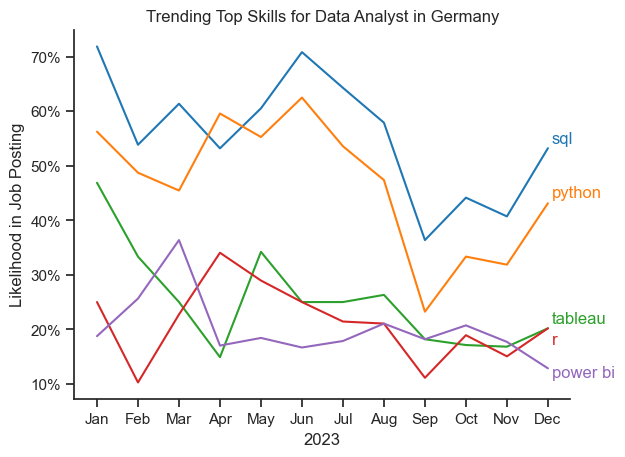

In [71]:
sns.lineplot(data = df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analyst in Germany')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter())

# Get last x-position
x_last = len(df_plot) - 1

# Vertical spacing to prevent overlap
label_positions = [55, 45, 22, 18, 12]

# Loop through each line + label position
for (col, y_label, line) in zip(df_plot.columns, label_positions, ax.lines):
    
    line_color = line.get_color()                # get the line's color
    y_actual = df_plot[col].iloc[-1]             # real end y-value

    plt.annotate(
        col,
        xy=(x_last, y_actual),
        xytext=(x_last + 0.1, y_label),
        textcoords='data',
        color=line_color,                        # make label match the line color
        va='center'
    )

plt.show()